In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (for later)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")


In [1]:
# Load the dataset
import pandas as pd

df = pd.read_csv('delhi_aqi.csv')

# Preview the first 5 rows
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [3]:
# Basic info about the dataset
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (18776, 9)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None

Summary statistics:
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      

In [5]:
# Drop rows with missing values (you can also use fillna() if preferred)
df_cleaned = df.dropna()

# Convert 'date' column to datetime if present
if 'date' in df_cleaned.columns:
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Re-check for any issues after cleaning
print("Shape after cleaning:", df_cleaned.shape)
print("Remaining missing values:")
print(df_cleaned.isnull().sum())

# Optional: Preview the cleaned data
df_cleaned.head()


Shape after cleaning: (18776, 9)
Remaining missing values:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


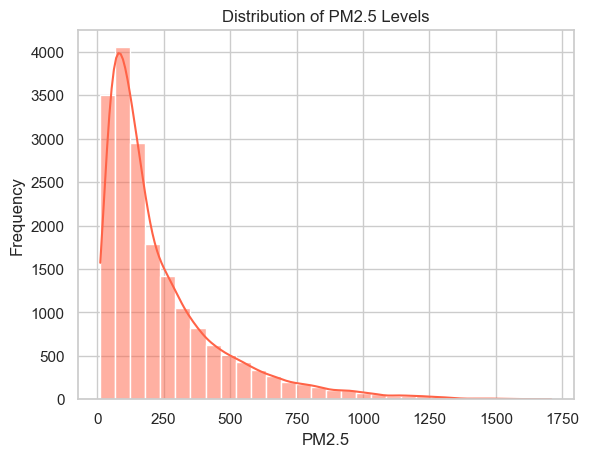

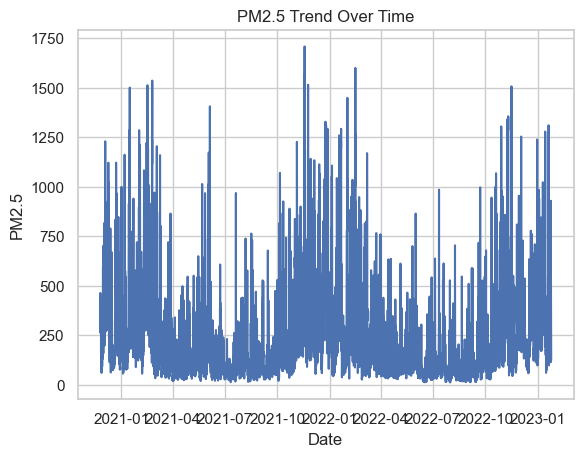

In [11]:
# Q1: Distribution of PM2.5
sns.histplot(df_cleaned['pm2_5'], bins=30, kde=True, color='tomato')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

# Q2: PM2.5 trend over time
sns.lineplot(x='date', y='pm2_5', data=df_cleaned)
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()


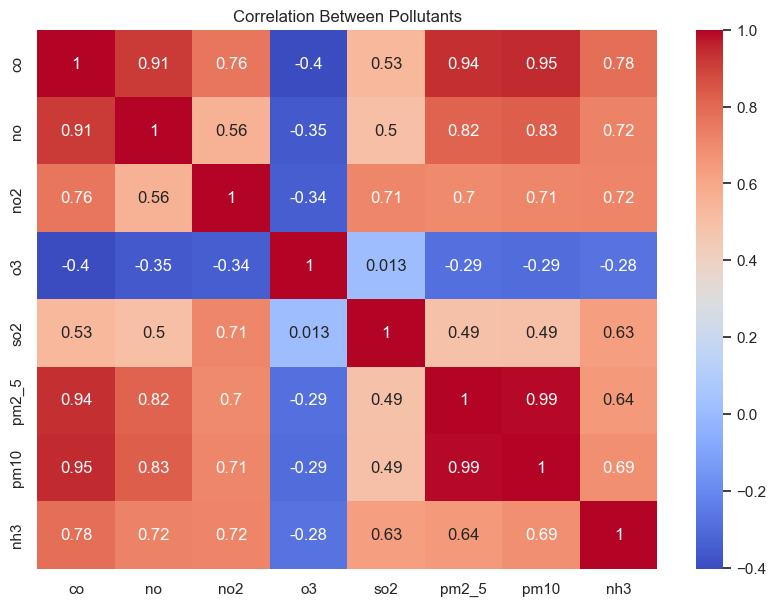

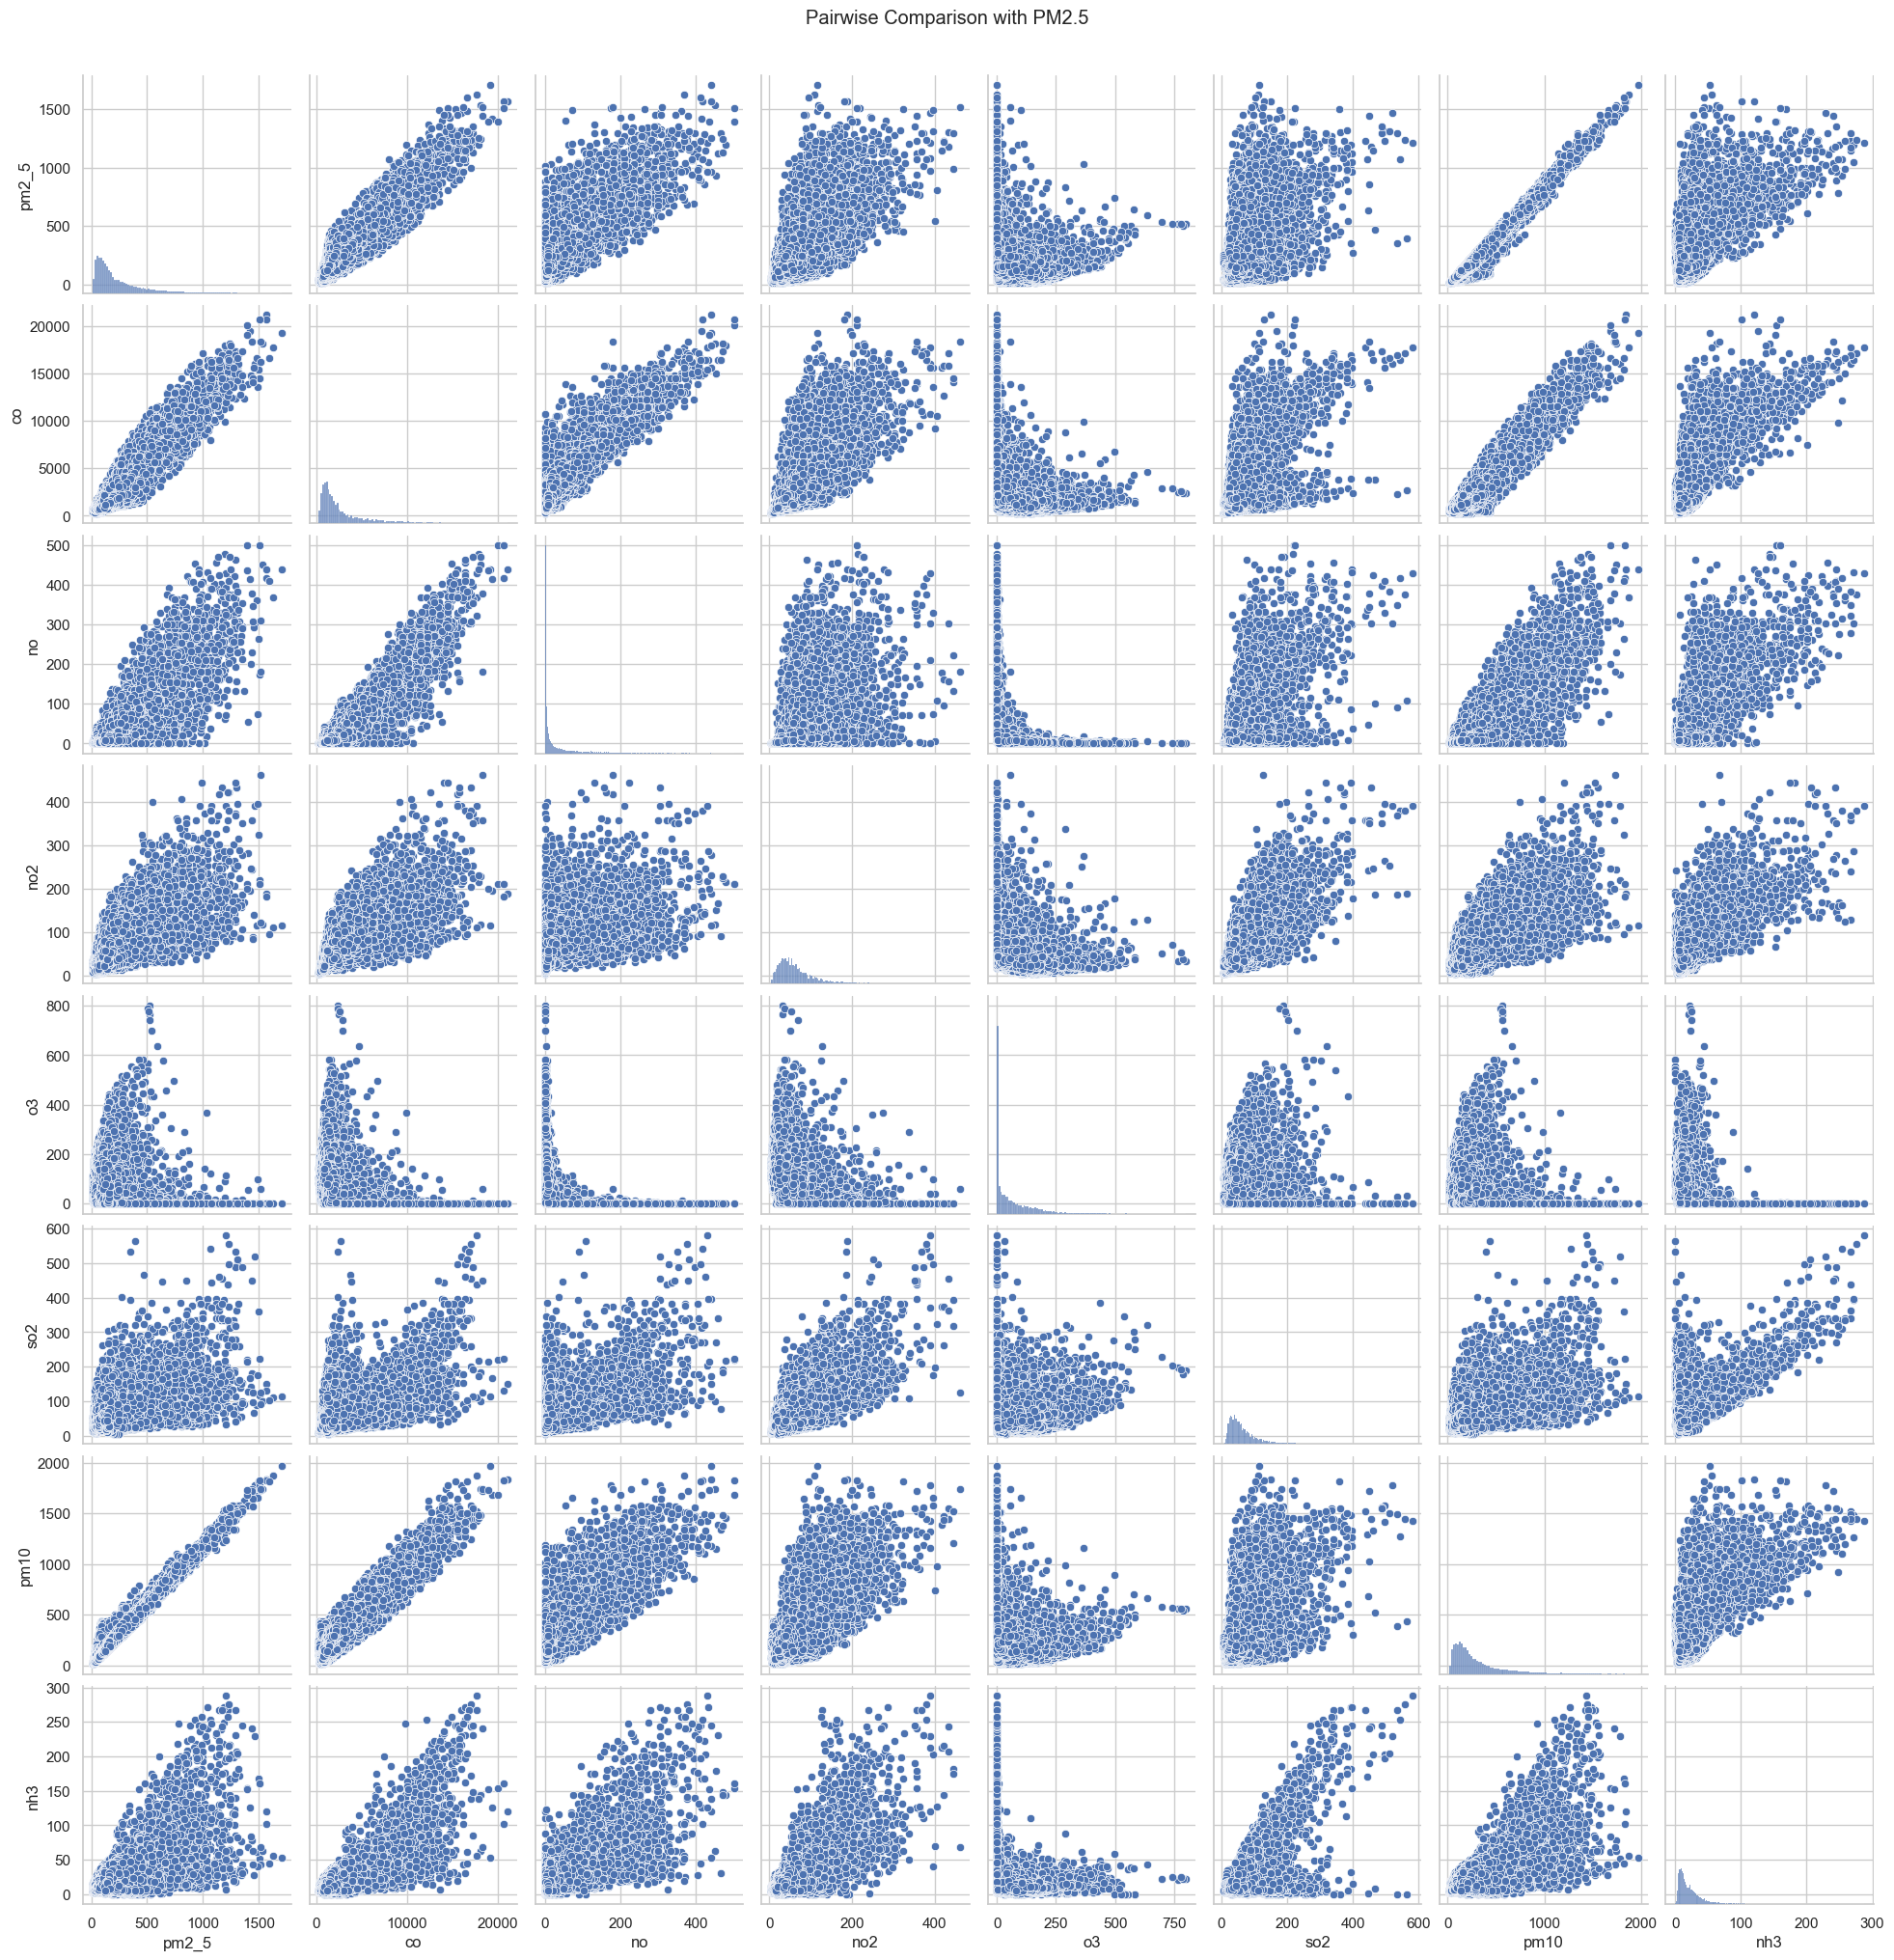

In [13]:
# Q3: Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_cleaned[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

# Q4: Pairplot to see PM2.5 vs other pollutants
sns.pairplot(df_cleaned[['pm2_5', 'co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3']])
plt.suptitle('Pairwise Comparison with PM2.5', y=1.02)
plt.show()


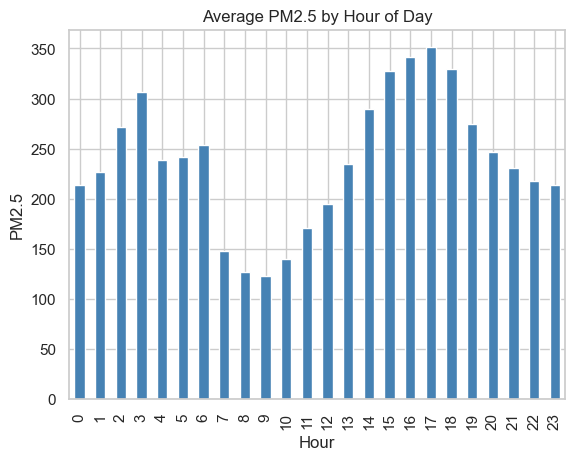

In [15]:
df_cleaned['hour'] = df_cleaned['date'].dt.hour
hourly_avg = df_cleaned.groupby('hour')['pm2_5'].mean()

hourly_avg.plot(kind='bar', color='steelblue')
plt.title('Average PM2.5 by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('PM2.5')
plt.show()


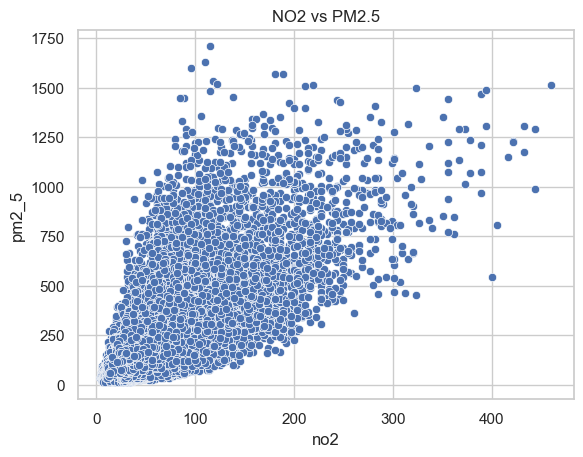

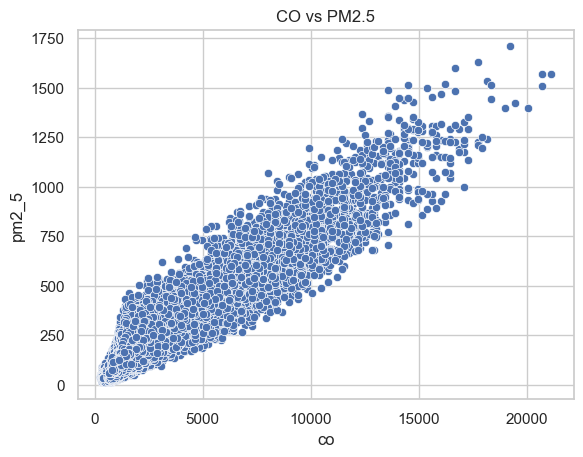

In [17]:
# Q6: NO2 vs PM2.5
sns.scatterplot(x='no2', y='pm2_5', data=df_cleaned)
plt.title('NO2 vs PM2.5')
plt.show()

# Q7: CO vs PM2.5
sns.scatterplot(x='co', y='pm2_5', data=df_cleaned)
plt.title('CO vs PM2.5')
plt.show()


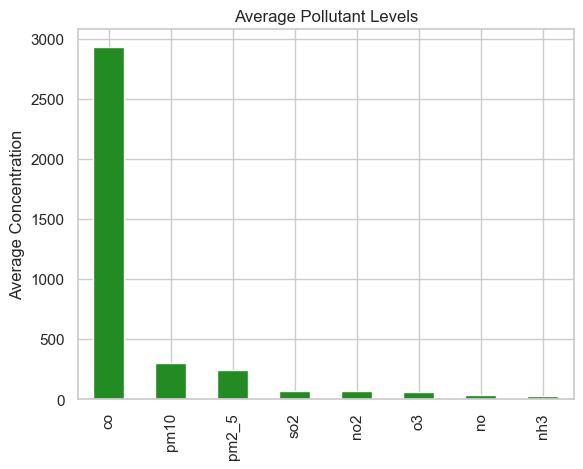

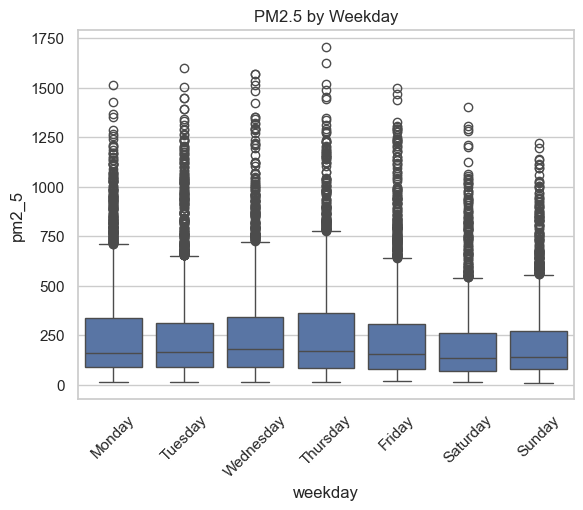

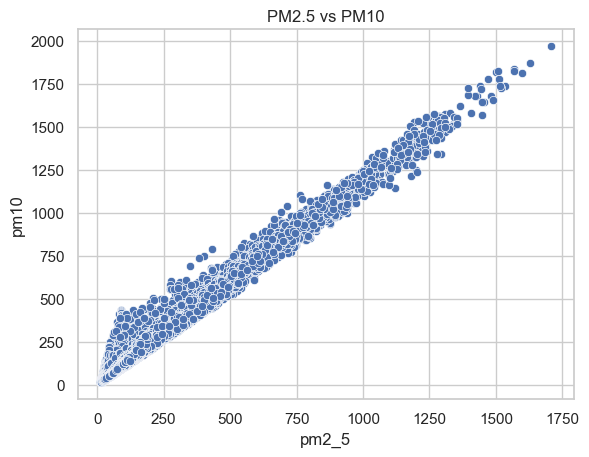

In [19]:
# Q8: Which pollutant is highest on average?
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
avg_values = df_cleaned[pollutants].mean().sort_values(ascending=False)

avg_values.plot(kind='bar', color='forestgreen')
plt.title('Average Pollutant Levels')
plt.ylabel('Average Concentration')
plt.show()

# Q9: PM2.5 levels by weekday
df_cleaned['weekday'] = df_cleaned['date'].dt.day_name()
sns.boxplot(x='weekday', y='pm2_5', data=df_cleaned,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('PM2.5 by Weekday')
plt.xticks(rotation=45)
plt.show()

# Q10: PM2.5 vs PM10
sns.scatterplot(x='pm2_5', y='pm10', data=df_cleaned)
plt.title('PM2.5 vs PM10')
plt.show()


In [21]:
# Extract time-based features
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['hour'] = df_cleaned['date'].dt.hour
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday  # 0=Monday

# Define features and target
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3', 'month', 'day', 'hour', 'weekday']
target = 'pm2_5'

X = df_cleaned[features]
y = df_cleaned[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show feature shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (15020, 11)
Test features shape: (3756, 11)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 9.380648695420659
Mean Squared Error (MSE): 232.94200274329367
Root Mean Squared Error (RMSE): 15.26243764093055
R² Score: 0.9953185199230965


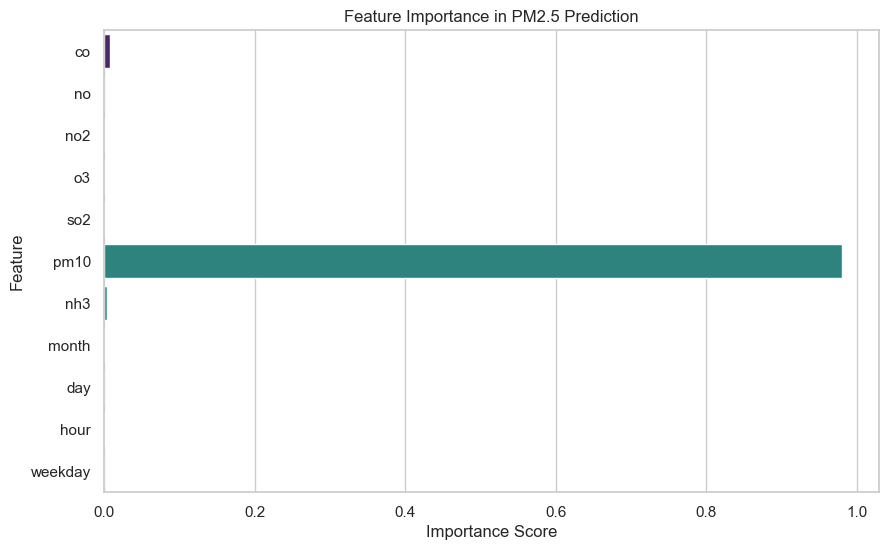

In [25]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance in PM2.5 Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [27]:
# Example input: [co, no, no2, o3, so2, pm10, nh3, month, day, hour, weekday]
sample_input = [[0.6, 25.0, 45.0, 20.0, 10.0, 180.0, 20.0, 11, 15, 9, 2]]  # Example values

# Predict using the trained model
predicted_pm25 = model.predict(sample_input)
print(f"Predicted PM2.5 level: {predicted_pm25[0]:.2f}")


Predicted PM2.5 level: 46.51


In [4]:
# Re-import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv('delhi_aqi.csv')

# Clean the data
df_cleaned = df.dropna()
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Print shape to check dataset size
print("Dataset shape:", df_cleaned.shape)


Dataset shape: (18776, 9)
